In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
cd /content/drive/MyDrive/Xử lí ảnh (DHMT18A, LAB)/Project_02

/content/drive/MyDrive/Xử lí ảnh (DHMT18A, LAB)/Project_02


In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [18]:
def show(img):
  plt.imshow(img, cmap='gray')
  plt.show()

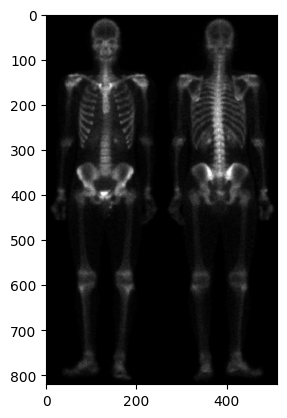

In [19]:
img = cv2.imread('image/input.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
show(img)

1. Unsharp masking

In [20]:
gaussian_img = cv2.GaussianBlur(img, (5, 5), 0)
unsharp_mask = cv2.addWeighted(img, 2, gaussian_img, -1, 0)
unsharp_mask = cv2.normalize(unsharp_mask, None, 0, 255, cv2.NORM_MINMAX)

# unsharp_mask = unsharp_mask / unsharp_mask.max() * 255
# unsharp_mask = np.clip(unsharp_mask, 0, 255)
# unsharp_mask = unsharp_mask.astype(np.uint8)

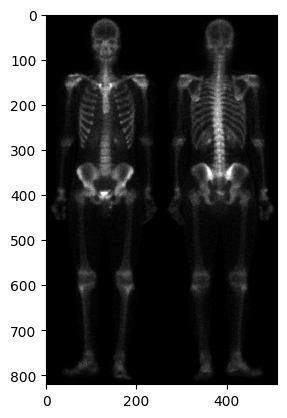

255


In [21]:
show(unsharp_mask)
print(unsharp_mask.max())

2. Caculating gradient

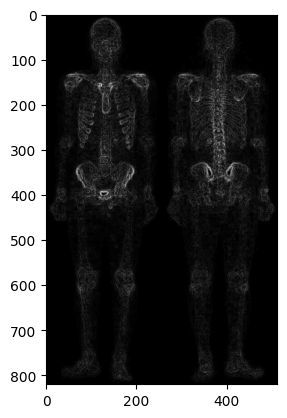

In [22]:
# Áp dụng toán tử Sobel theo trục x và trục y
sobel_x = cv2.Sobel(unsharp_mask, cv2.CV_64F, 1, 0, ksize=3)  # Sobel theo trục x
sobel_y = cv2.Sobel(unsharp_mask, cv2.CV_64F, 0, 1, ksize=3)  # Sobel theo trục y

# Tính độ lớn gradient
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
# gradient_magnitude = gradient_magnitude / gradient_magnitude.max() * 255
# gradient_magnitude = np.clip(gradient_magnitude, 0, 255)
# gradient_magnitude = gradient_magnitude.astype(np.uint8)
gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)

show(gradient_magnitude)

3. Combining two previous result

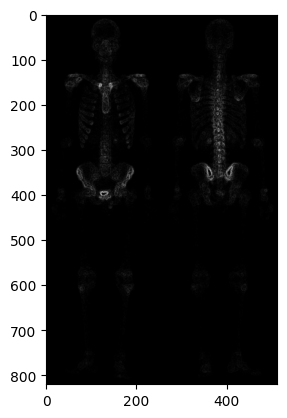

203


In [23]:
unsharp_mask = unsharp_mask.astype(np.float64)
combining_img = cv2.multiply(unsharp_mask, gradient_magnitude / gradient_magnitude.max())
# combining_img = combining_img / combining_img.max() *255
normalized_image = cv2.normalize(combining_img, None, 0, 255, cv2.NORM_MINMAX)
combining_img = combining_img.astype(np.uint8)
show(combining_img)
print(combining_img.max())

4. Adding the contrasted Image to the Initial Image

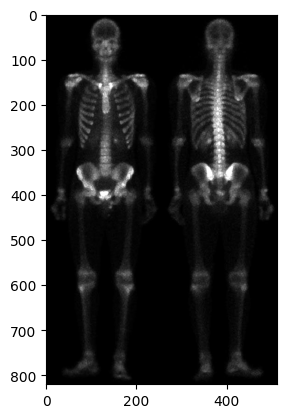

255


In [24]:
# img = img.astype(np.float64)
constrasted_img = cv2.add(img, combining_img)
show(constrasted_img)
print(constrasted_img.max())

5. Power_law

In [25]:
constrasted_img = constrasted_img / 255

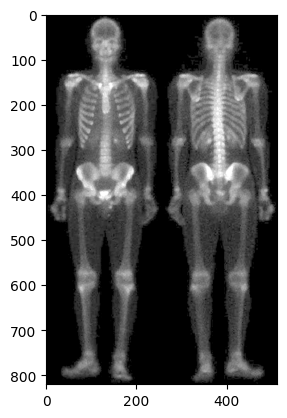

In [26]:

pow_transform = np.power(constrasted_img, 0.4)
pow_transform = cv2.normalize(pow_transform, None, 0, 255, cv2.NORM_MINMAX)
pow_transform = pow_transform.astype(np.uint8)
show(pow_transform)